# Modelo de SIR

Abril Palencia
Andrea Paniagua

Link a documento con Discusión: https://github.com/andreapaniagua/Modelo-SIR

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from pylab import *
%matplotlib inline
import mpld3
from numpy import zeros, linspace
import matplotlib.pyplot as plt

In [6]:
def dAdt(A, t, beta, gamma, N):
    S= A[0]
    I = A[1]
    R = A[2]
    return [
        -beta/N * S * I,
        beta/N * S * I - gamma * I,
        gamma*I
    ]

In [7]:
times = np.arange(0, 100, 1)
gamma = 1/10
N = 1.1e7
beta = 0.39
S0, I0, R0 = N-574, 574, 0
sol = odeint(dAdt, y0=[S0, I0, R0], t=times, args=(beta, gamma, N))

In [8]:
S = sol.T[0]
I = sol.T[1]
R = sol.T[2]

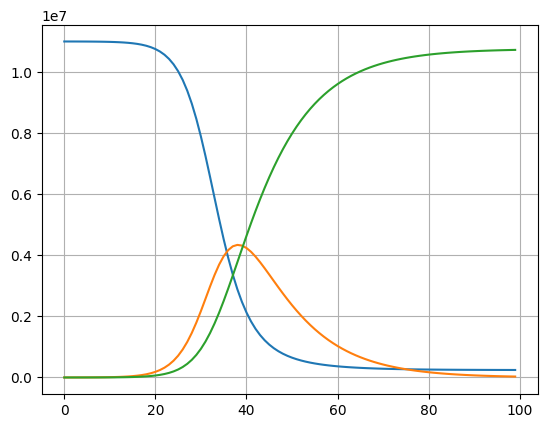

In [9]:
plt.plot(times, S)
plt.plot(times, I)
plt.plot(times, R)
plt.grid()

## Método de Euler

In [12]:
def f(x,y):
    return xy

In [17]:
def Euler(x0, y0, f, h, xf):
    x = arange(x0, xf, h)
    y = [y0]
    n = len(x)
    for i in range(0, n-1):
        y.append(y[i]+h*f(x[i],y[i]))
    return x,y

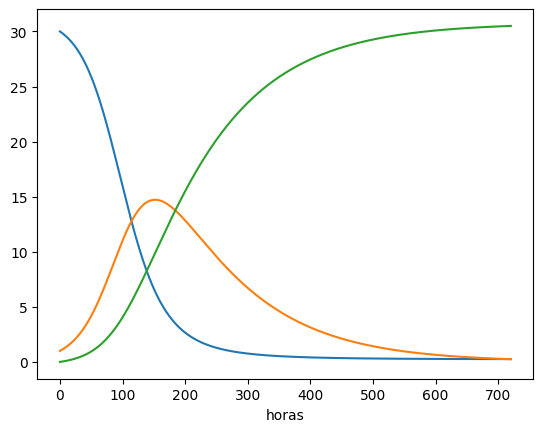

In [24]:
beta = 10./(40*8*24)
gamma = 3./(15*24)
# 6 minutos
dt = 0.1 
# dias
D = 30              
N_t = int(D*24/dt) 

#iniciar variables
t = linspace(0, N_t*dt, N_t+1)
S = zeros(N_t+1)
I = zeros(N_t+1)
R = zeros(N_t+1)

# Condiciones
S[0] = 30
I[0] = 1
R[0] = 0

# euler
for n in range(N_t):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]

fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
plt.xlabel('horas')
plt.show()